## Sales Analysis

##### Import Necessary Libraries

In [3]:
import pandas as pd
# OS module in python provides functions for interacting with the operating system
import os
import numpy as np
import matplotlib.pyplot as plt


##### Task 1:Merging 12 Month of Data into Single File

In [4]:
# ./-current dirctory
#df=pd.read_csv('./Sales_Data/Sales_April_2019.csv')

#creating an empty dataframe
all_months_data=pd.DataFrame()

# To get the list of all files and directories in the specified directory
# sales_data dirctory in which i hv stored all sales month data
files=os.listdir('./Sales_Data')

for file in files:
    #print(file)
    
    #placing all month data in dataframe
    df=pd.read_csv('./Sales_Data/'+file) 
    #print(df)
    
    #concate and store in dataframe
    #pd.concat([df1, df2]) for concation of two data frame
    all_months_data=pd.concat([all_months_data,df])
    
#print(all_months_data)
# saving a Pandas DataFrame as a CSV file 
all_months_data.to_csv("all_data.csv",index=False)

    
    



### Read in Updated DataFrame

In [5]:
# read or load data from CSV files.
all_data=pd.read_csv('all_data.csv')
all_data.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016"
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101"
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301"
9,176565,Macbook Pro Laptop,1,1700,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016"


## Clean Up The Data

##### Drop Rows of NAN

In [7]:
#Display row with one or more nan values
#axis=0 is the dimension that points downwards and axis=1 the one that points to the right.
#The any() function is used to check whether any element is True, potentially over an axis.
nan_df=all_data[all_data.isna().any(axis=1)]
nan_df

#other method to check null value in coulmn month
#nan_df = all_data[all_data['month'].isnull()]

#removal of all row with NaN,any will drop row which have single NaN
# 'any' : if any NA values are present, drop that label; 'all' : if all values are NA, drop that label.
all_data=all_data.dropna(how='all')
nan_df



,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185176,NaN,NaN,NaN,NaN,NaN,NaN
185438,NaN,NaN,NaN,NaN,NaN,NaN
186042,NaN,NaN,NaN,NaN,NaN,NaN
186548,NaN,NaN,NaN,NaN,NaN,NaN


#### Find 'Or' and delete it

In [8]:
#detecting 'Or' value in order date
temp_data=all_data[all_data['Order Date'].str[0:2]=='Or']
temp_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [9]:
#reset value of all_data without including repeated value
all_data=all_data[all_data['Order Date'].str[0:2]!='Or']
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


#### Convert column to correct data type

In [10]:
#convert value of column in numeric(int- do not hv decimal value)
all_data['Quantity Ordered']=pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each']=pd.to_numeric(all_data['Price Each'])

#### Augment Data with additional columns

##### Task 2 :Add month column

In [12]:
#adding a new column month
#all_data['month']=3

#str[0:2] to get first two letter of string
#all_data['month']=[month for month in all_data['Order Date'].str[0:2]]
all_data['month']=all_data['Order Date'].str[0:2]

#changing into integer from string month =04 is string convrting it to 4
all_data['month']=all_data['month'].astype('int32')
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### Task 3: Add a Sales Column

In [13]:
# sale= quantity * price
all_data['Sales']=all_data['Quantity Ordered'] * all_data['Price Each']
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99


### Task 4: Add a City Column

In [14]:
#adding a city column
# use .apply() function-segregate data according to the conditions required,it takes input as function object

# all_data['City']=all_data['Purchase Address'].apply(lambda x: x.split(',')[1:3])
# all_data.head()

#other method using function
def getcity(address):
    #to get first element after split
    return address.split(',')[1]

def getstate(address):
    return address.split(',')[2].split(' ')[1]
    
all_data['City']=all_data['Purchase Address'].apply(lambda x: getcity(x)+' '+getstate(x))
all_data.head()




,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


### Question 1: What was the best month for sales? How much was earned that month?

In [13]:
#split the data into group
results=all_data.groupby('month').sum()
results

,Quantity Ordered,Price Each,Sales
month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


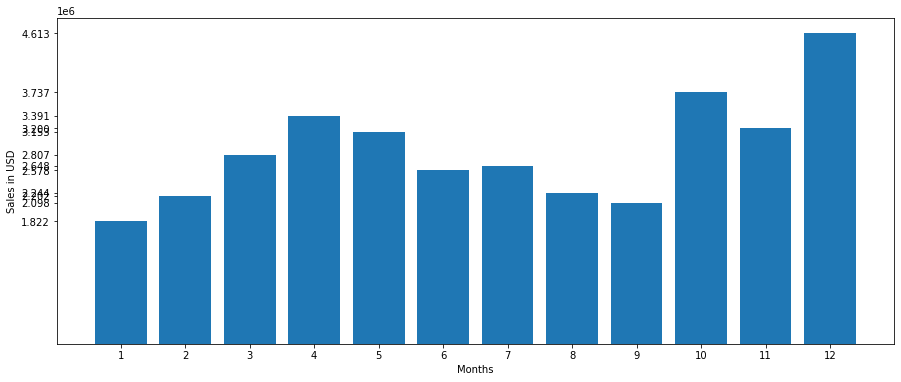

In [14]:
#visualize data
plt.figure(figsize=(15,6),frameon=False,)
months=range(1,13)
plt.bar(months,results['Sales'])

plt.xticks(months)
plt.yticks(results['Sales'])

plt.xlabel('Months')
plt.ylabel('Sales in USD')




plt.show()

### Question 2: What city had the highest no of sale

In [185]:
results2=all_data.groupby('City').sum()
print(results2)

city_bar=[city for city,df in all_data.groupby('City')]

print(city_bar)

                   Quantity Ordered    Price Each   month         Sales  \
City                                                                      
 Atlanta GA                   16602  2.779908e+06  104794  2.795499e+06   
 Austin TX                    11153  1.809874e+06   69829  1.819582e+06   
 Boston MA                    22528  3.637410e+06  141112  3.661642e+06   
 Dallas TX                    16730  2.752628e+06  104620  2.767975e+06   
 Los Angeles CA               33289  5.421435e+06  208325  5.452571e+06   
 New York City NY             27932  4.635371e+06  175741  4.664317e+06   
 Portland ME                   2750  4.471893e+05   17144  4.497583e+05   
 Portland OR                  11303  1.860558e+06   70621  1.870732e+06   
 San Francisco CA             50239  8.211462e+06  315520  8.262204e+06   
 Seattle WA                   16553  2.733296e+06  104941  2.747755e+06   

                     Hour   Minute  
City                                
 Atlanta GA        214264

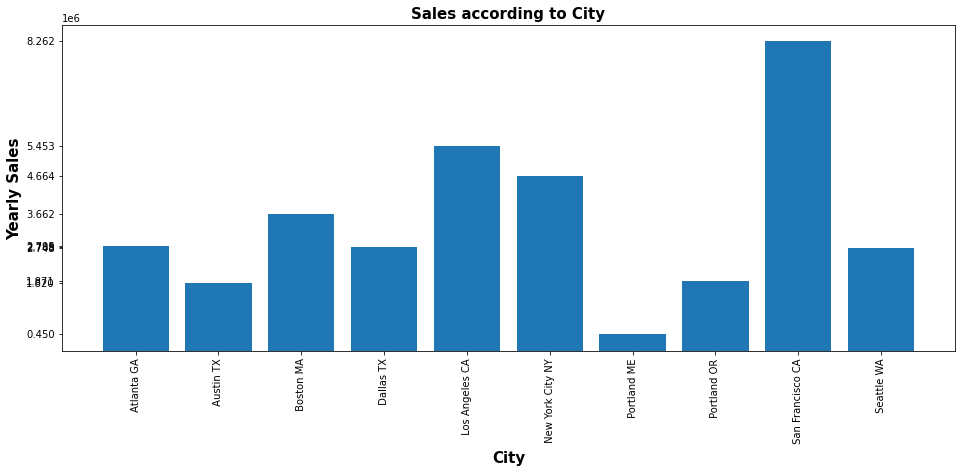

In [188]:
plt.figure(figsize=(16,6))

plt.title('Sales according to City',fontweight='bold',fontsize=15)

plt.xlabel('City',fontsize=15,fontweight='bold')
plt.ylabel('Yearly Sales',fontsize=15,fontweight='bold')


plt.yticks(results2['Sales'])
plt.xticks(range(0,len(city_bar)),city_bar,rotation='vertical')

plt.bar(city_bar,results2['Sales'])

plt.show()

In [ ]:
Ans -sanfransicso

### Question-3 :What time should we display advertisements to maximize likelihood of customer's buying product

In [83]:
#convert Order date date time library into date time object using date time function
all_data['Order Date']=pd.to_datetime(all_data['Order Date'])


In [87]:
all_data.head()
#adding hour column to data
all_data['Hour']=all_data['Order Date'].dt.hour
all_data['Minute']=all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9,27


In [105]:
hour_plot =all_data.groupby('Hour').count()
print(hour_plot['Quantity Ordered'])

hours=[hours for hours,df in all_data.groupby('Hour') ]
print(hours)



Hour
0      3910
1      2350
2      1243
3       831
4       854
5      1321
6      2482
7      4011
8      6256
9      8748
10    10944
11    12411
12    12587
13    12129
14    10984
15    10175
16    10384
17    10899
18    12280
19    12905
20    12228
21    10921
22     8822
23     6275
Name: Quantity Ordered, dtype: int64
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


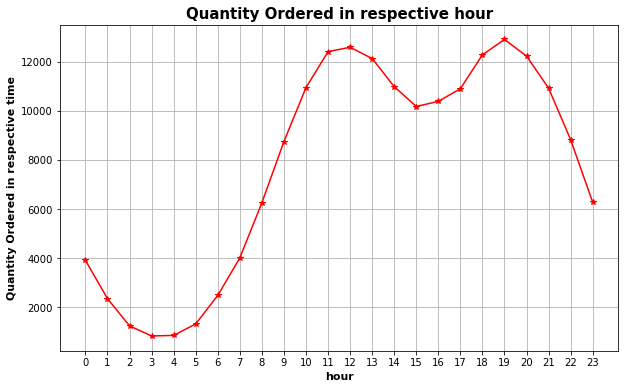

In [123]:
plt.figure(figsize=(10,6))

plt.title("Quantity Ordered in respective hour",fontweight='bold',fontsize=15)

#plt.yticks(hour_plot['Quantity Ordered'])
plt.xticks(hours)

plt.xlabel('hour',fontsize=11,fontweight='bold')
plt.ylabel('Quantity Ordered in respective time',fontsize=11,fontweight='bold')

plt.plot(hours,hour_plot['Quantity Ordered'],'r-*')

plt.grid()
plt.show()

#### Question 4: What products are most often sold ???

In [192]:
#finding product and total no of Quantity ordered
quantity=all_data.groupby('Product').count()
print(quantity['Quantity Ordered'])

#finding product

# products=all_data['Product'].unique()
# print(products)

#other method to find product we are using groupby-do not repeat same product again
prod=[str(prod) for prod,df in all_data.groupby('Product')]
# print(prod)




Product
20in Monitor                   4101
27in 4K Gaming Monitor         6230
27in FHD Monitor               7507
34in Ultrawide Monitor         6181
AA Batteries (4-pack)         20577
AAA Batteries (4-pack)        20641
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
Flatscreen TV                  4800
Google Phone                   5525
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      21658
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
USB-C Charging Cable          21903
Vareebadd Phone                2065
Wired Headphones              18882
iPhone                         6842
Name: Quantity Ordered, dtype: int64


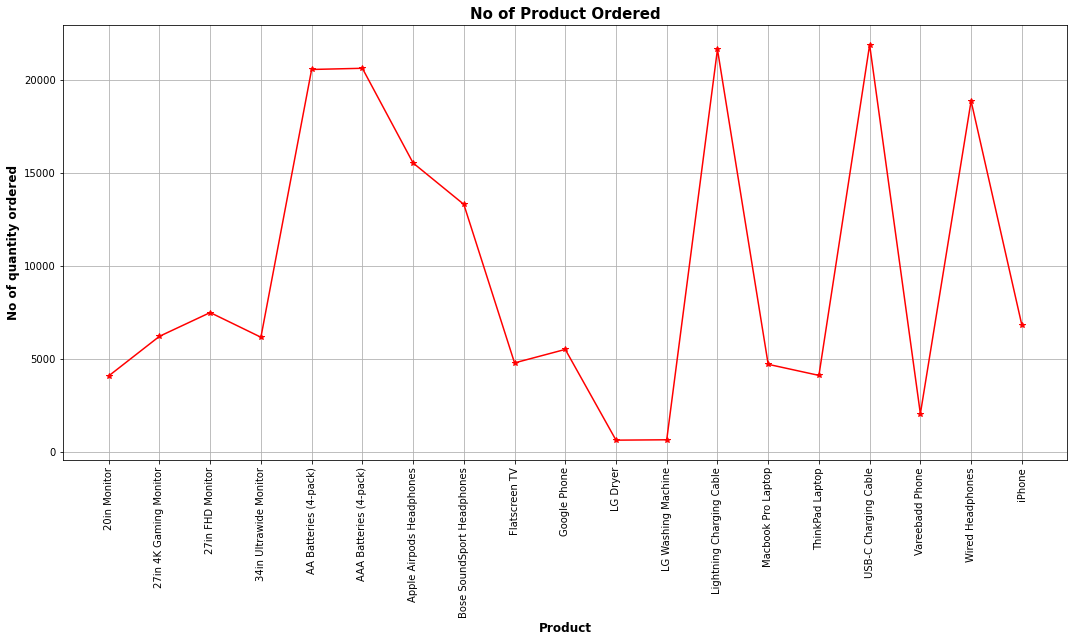

In [191]:
plt.figure(figsize=(18,8))


plt.title("No of Product Ordered",fontweight='bold',fontsize=15)


plt.xticks(range(0,len(prod)),prod,rotation='vertical')

plt.xlabel('Product',fontsize=12,fontweight='bold')
plt.ylabel('No of quantity ordered',fontweight='bold',fontsize=12)

plt.plot(prod,quantity['Quantity Ordered'],'r-*')

plt.grid()
plt.show()

#### Question 5: Which product are most often sold together ???

In [15]:
# creating a new dataframe to find duplicate value in order id
# keep=False,means,it consider all of the same values as duplicates.
# duplicated() determines which elements of a vector or data frame are duplicates of elements with smaller subscripts, 
# and returns a logical vector indicating which elements (rows) are duplicates.

new_df=all_data[all_data['Order ID'].duplicated(keep=False)]# use shift+tab to get


new_df.head(20)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,City
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles CA
30,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",4,99.99,Boston MA
31,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",4,99.99,Boston MA
32,176586,AAA Batteries (4-pack),2,2.99,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco CA
33,176586,Google Phone,1,600.00,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4,600.00,San Francisco CA
119,176672,Lightning Charging Cable,1,14.95,04/12/19 11:07,"778 Maple St, New York City, NY 10001",4,14.95,New York City NY
120,176672,USB-C Charging Cable,1,11.95,04/12/19 11:07,"778 Maple St, New York City, NY 10001",4,11.95,New York City NY


In [16]:
#adding new column grouped and putting product of same order id  together
# accessing product with same order id and joining them with comma

new_df['Grouped']=new_df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))

new_df.head(20)

<ipython-input-16-188816d0c86a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Grouped']=new_df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,City,Grouped
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles CA,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",4,99.99,Boston MA,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",4,99.99,Boston MA,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,AAA Batteries (4-pack),2,2.99,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco CA,"AAA Batteries (4-pack),Google Phone"
33,176586,Google Phone,1,600.00,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4,600.00,San Francisco CA,"AAA Batteries (4-pack),Google Phone"
119,176672,Lightning Charging Cable,1,14.95,04/12/19 11:07,"778 Maple St, New York City, NY 10001",4,14.95,New York City NY,"Lightning Charging Cable,USB-C Charging Cable"
120,176672,USB-C Charging Cable,1,11.95,04/12/19 11:07,"778 Maple St, New York City, NY 10001",4,11.95,New York City NY,"Lightning Charging Cable,USB-C Charging Cable"


In [17]:
#drop repeated order id 
#Return DataFrame with duplicate rows removed
new_df=new_df[['Order ID','Grouped']].drop_duplicates() 

new_df.head()

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [28]:
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary

# itertools package - to find permutations and combinations of a sequence
# takes a list and a input r as a input and return a object 
# list of tuples which contain all possible combination of length r in a list form.

from itertools import combinations

# Counter-It is an unordered collection where elements are stored as dictionary keys 
# and their counts are stored as dictionary values. 

from collections import Counter

count = Counter()

for row in new_df["Grouped"]:
    
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))
    
    #print(row)

# most_common() is used to produce a sequence of the n most frequently encountered input values and their respective counts    
for key,value in count.most_common():
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92
('Lightning Charging Cable', 'Apple Airpods Headphones') 81
('Vareebadd Phone', 'Bose SoundSport Headphones') 80
('USB-C Charging Cable', 'Bose SoundSport Headphones') 77
('Apple Airpods Headphones', 'Wired Headphones') 69
('Lightning Charging Cable', 'USB-C Charging Cable') 58
('Lightning Charging Cable', 'AA Batteries (4-pack)') 55
('Lightning Charging Cable', 'Lightning Charging Cable') 54
('Bose SoundSport Headphones', 'Wired Headphones') 53
('AA Batteries (4-pack)', 'Lightning Charging Cable') 51
('AAA Batteries (4-pack)', 'USB-C Chargin